In [21]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
mnist = fetch_openml("mnist_784")

In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [4]:
X, y = mnist.data, mnist.target

In [5]:
X.shape, y.shape

((70000, 784), (70000,))

In [6]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

### KNN预测所需时间

In [7]:
knn = KNeighborsClassifier()

In [8]:
%%time
knn.fit(X_train, y_train)

CPU times: user 29.7 s, sys: 261 ms, total: 29.9 s
Wall time: 29.9 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [9]:
%time knn.score(X_test, y_test)

CPU times: user 11min 42s, sys: 2.19 s, total: 11min 44s
Wall time: 11min 49s


0.9688

### PCA降维后预测

In [11]:
pca = PCA(0.95)

In [12]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.n_components_

154

In [13]:
X_train_reduce = pca.transform(X_train)
X_test_reduce = pca.transform(X_test)

In [17]:
%%time
knn2 = KNeighborsClassifier()
knn2.fit(X_train_reduce, y_train)

CPU times: user 1.2 s, sys: 13.8 ms, total: 1.21 s
Wall time: 1.21 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [18]:
%time knn2.score(X_test_reduce, y_test)

CPU times: user 2min 10s, sys: 449 ms, total: 2min 11s
Wall time: 2min 12s


0.9714

### 图形化MNIST

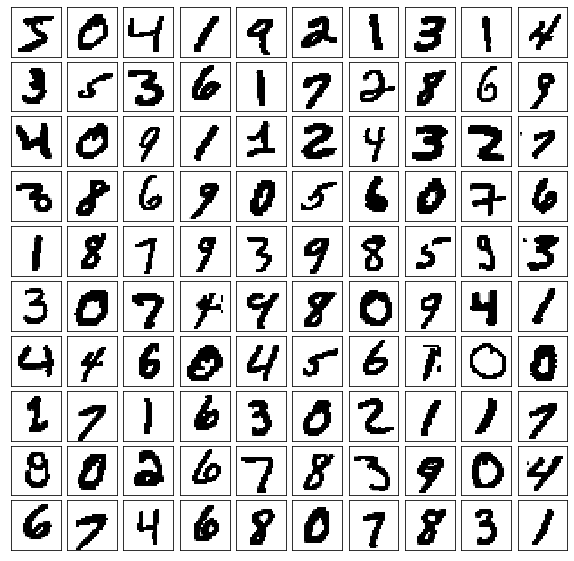

In [22]:
def plot_mnist(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_mnist(X[:100])